In [31]:
import pandas as pd
sales = pd.read_csv("sales.csv")

In [40]:
#selecting rows on a condition , rows of all male gender
sales[sales['Gender']=="Male"]


,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating
0,460489604,1/25/2018,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5
5,263634050,03-09-2018,17:55,Male,Brookfield,NewYork,Yes,Clothing,52,4,208,Gpay,3
6,99646662,03-04-2018,13:21,Male,Water tower,Chicago,No,Clothing,81,3,243,Cash,4
7,188869875,03-08-2018,13:24,Male,Park lane,Dallas,No,Books,80,2,160,Cash,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,927909627,03-02-2018,13:35,Male,Brookfield,NewYork,No,Books,54,1,54,Card,1
994,446582560,1/31/2018,19:00,Male,Water tower,Chicago,No,Fashion,29,5,145,Cash,4
995,818829599,3/26/2018,11:19,Male,Park lane,Dallas,No,Groceries,31,4,124,Card,3
996,556589713,2/20/2018,17:17,Male,Water tower,Chicago,Yes,Groceries,3,5,15,Gpay,3


In [41]:
# Queries To Find Conditional Data 
sales.query('City=="NewYork" & Payment=="Cash"')

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating
0,460489604,1/25/2018,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2
20,619639105,3/26/2018,19:48,Female,Brookfield,NewYork,No,Groceries,44,6,264,Cash,1
31,567867755,02-03-2018,20:59,Female,Brookfield,NewYork,No,Furniture,86,3,258,Cash,2
37,460044751,2/22/2018,16:20,Male,Brookfield,NewYork,No,Fashion,45,5,225,Cash,4
70,554361739,01-02-2018,17:24,Male,Brookfield,NewYork,Yes,Books,97,6,582,Cash,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,919895826,1/14/2018,17:12,Male,Brookfield,NewYork,Yes,Furniture,37,6,222,Cash,3
969,134230335,2/26/2018,20:51,Male,Brookfield,NewYork,No,Books,88,5,440,Cash,5
989,941364541,3/13/2018,14:53,Female,Brookfield,NewYork,No,Sporting,19,7,133,Cash,1
993,455112063,3/19/2018,17:30,Female,Brookfield,NewYork,Yes,Clothing,3,3,9,Cash,2


In [42]:
#sum,max,min of particular column
sales.sum()['Total']

207788

In [44]:
sales.max()['Total']

693

In [54]:
sales.min()['Total']

1

In [55]:
sales[sales['Total']==sales.max()['Total']]

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating
47,315624039,3/30/2018,19:45,Female,Water tower,Chicago,Yes,Groceries,99,7,693,Gpay,3
679,270918350,3/27/2018,13:21,Female,Park lane,Dallas,Yes,Groceries,99,7,693,Gpay,2


In [56]:
sales[sales['Total']==sales.min()['Total']]

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating
184,801334050,1/21/2018,20:18,Female,Park lane,Dallas,No,Furniture,1,1,1,Gpay,2
587,646176653,03-10-2018,19:39,Male,Park lane,Dallas,Yes,Sporting,1,1,1,Cash,2


In [63]:
#Using GroupBy To Group Data By Location
sales.groupby('City').sum()['Total']

City
Chicago    65215
Dallas     70432
NewYork    72141
Name: Total, dtype: int64

In [64]:
sales.groupby('Date').sum()["Total"]

Date
01-01-2018    2649
01-02-2018    2166
01-03-2018    2374
01-04-2018    1192
01-05-2018    1773
              ... 
3/26/2018     2122
3/27/2018     2716
3/28/2018     2412
3/29/2018     1944
3/30/2018     2070
Name: Total, Length: 89, dtype: int64

In [66]:
#which location has higest and the lowest sales?
#represent the sales on a bar chart, also show the market share for each location using a pie chart
location_list = sales.groupby('Location')

In [70]:
location = [x for x,y in location_list]
location

['Brookfield', 'Park lane', 'Water tower']

In [71]:
sales.groupby('Location').sum()["Total"]

Location
Brookfield     72141
Park lane      70432
Water tower    65215
Name: Total, dtype: int64

In [72]:
import matplotlib.pyplot as plt

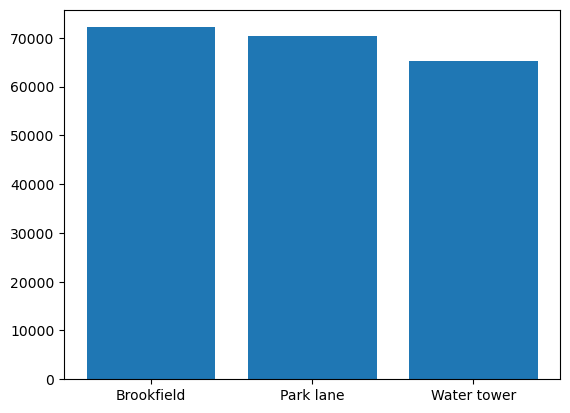

In [75]:
plt.bar(location,sales.groupby('Location').sum()["Total"])
plt.show()

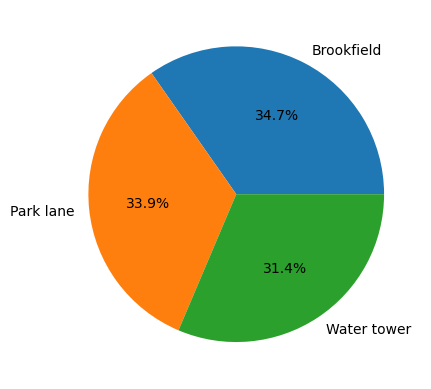

In [83]:
plt.pie(sales.groupby('Location').sum()["Total"],labels=location,autopct='%1.1f%%')
plt.show()

In [113]:
#Classifying Shoppers
location_sales = sales.groupby(['Gender','Location']).count()['Invoice ID']

In [114]:
location_sales

Gender  Location   
Female  Brookfield     179
        Park lane      179
        Water tower    143
Male    Brookfield     161
        Park lane      153
        Water tower    185
Name: Invoice ID, dtype: int64

In [115]:
unstacked_sales = location_sales.unstack(level=0)

In [116]:
unstacked_sales

Gender,Female,Male
Location,,
Brookfield,179,161
Park lane,179,153
Water tower,143,185


<Axes: xlabel='Location'>

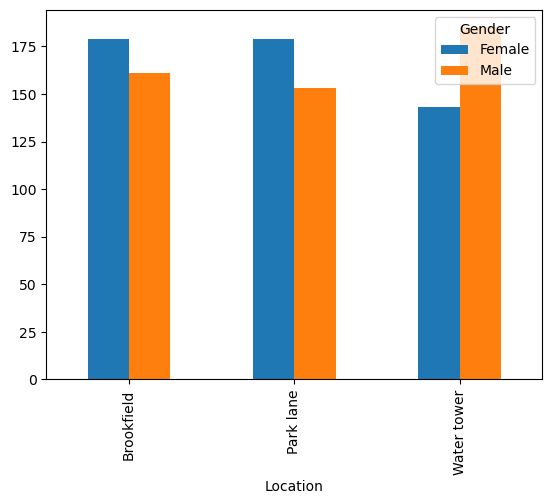

In [120]:
unstacked_sales.plot(kind='bar')

In [121]:
#1.Which branch has more members vs which has less members?
#2. Which branch has higest rating and which has the lowest?
members = sales.groupby(['Member','Location']).count()['Invoice ID']

In [122]:
members

Member  Location   
No      Brookfield     173
        Park lane      167
        Water tower    159
Yes     Brookfield     167
        Park lane      165
        Water tower    169
Name: Invoice ID, dtype: int64

In [124]:
members.unstack(level=0)

Member,No,Yes
Location,,
Brookfield,173,167
Park lane,167,165
Water tower,159,169


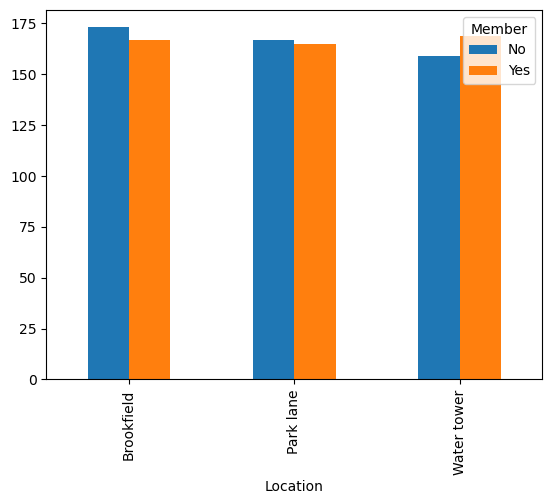

In [126]:
members.unstack(level=0).plot(kind='bar')
plt.show()

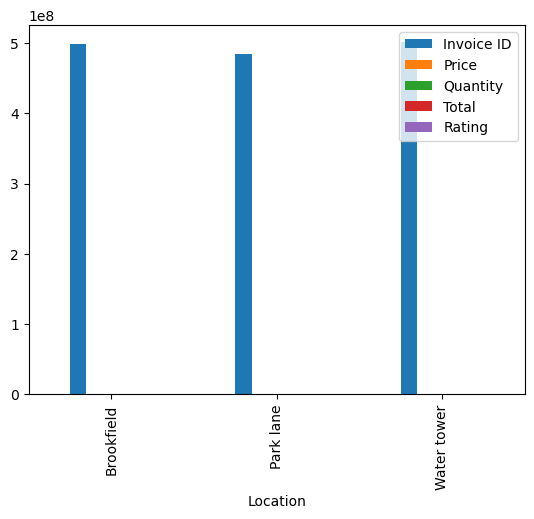

In [130]:
rating = sales.groupby('Location').mean('Rating').plot(kind='bar')
plt.show()


In [139]:
#1. Which city has more females shopping?
#gender
#1. Who spends more men or women?
#Customer type
#1. Which type of customer spends more member or a non member?
#product line
# 1. Which product line sells more?
#product line
#2. Which product line is popular among men vs women?
female_shoppers = sales.groupby(['City','Gender']).count()['Invoice ID']
female_shoppers

City     Gender
Chicago  Female    143
         Male      185
Dallas   Female    179
         Male      153
NewYork  Female    179
         Male      161
Name: Invoice ID, dtype: int64

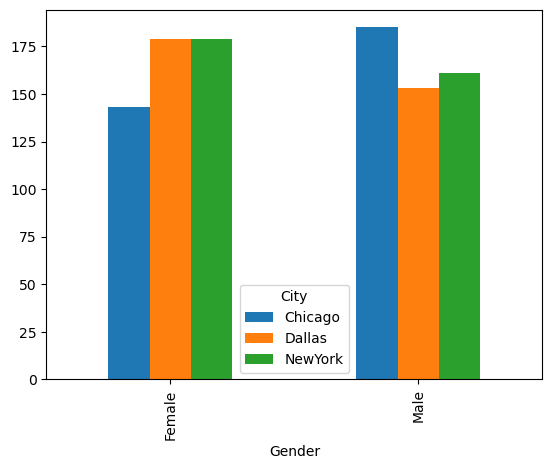

In [141]:
female_shoppers.unstack(level=0).plot(kind='bar')
plt.show()

In [142]:
spend = sales.groupby('Gender').sum()['Total']
spend

Gender
Female    106452
Male      101336
Name: Total, dtype: int64

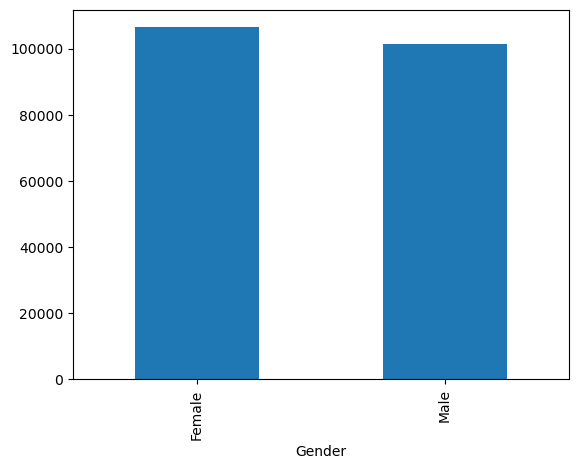

In [147]:
spend.plot(kind='bar')
plt.show()

In [150]:
member = sales.groupby('Member').sum()['Total']

In [151]:
member


Member
No     100245
Yes    107543
Name: Total, dtype: int64

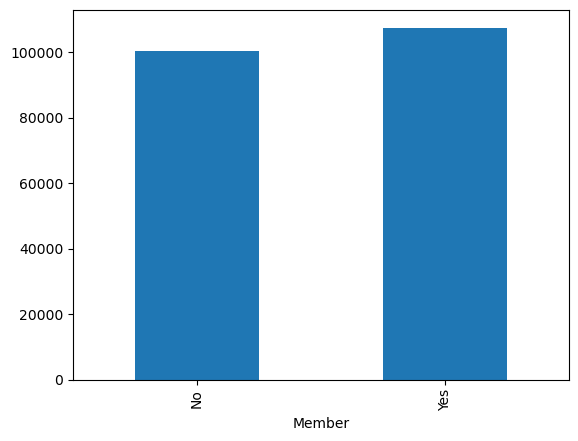

In [152]:
member.plot(kind='bar')
plt.show()

In [155]:
category_sales = sales.groupby('Category').count()["Rating"]

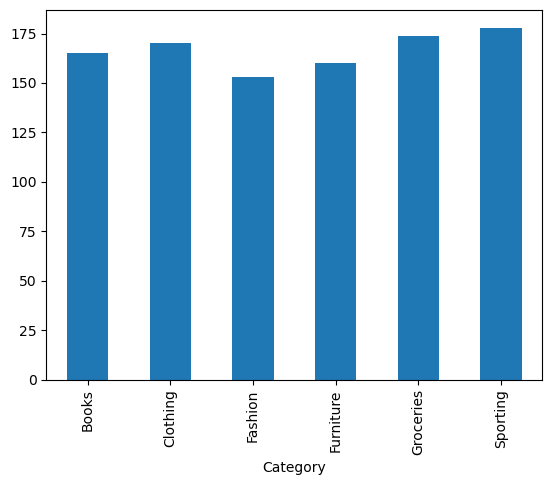

In [157]:
category_sales.plot(kind='bar')
plt.show()

In [160]:
sales_m_w = sales.groupby(['Gender','Category']).count()['Rating']
sales_m_w

Gender  Category 
Female  Books        88
        Clothing     81
        Fashion      81
        Furniture    78
        Groceries    87
        Sporting     86
Male    Books        77
        Clothing     89
        Fashion      72
        Furniture    82
        Groceries    87
        Sporting     92
Name: Rating, dtype: int64

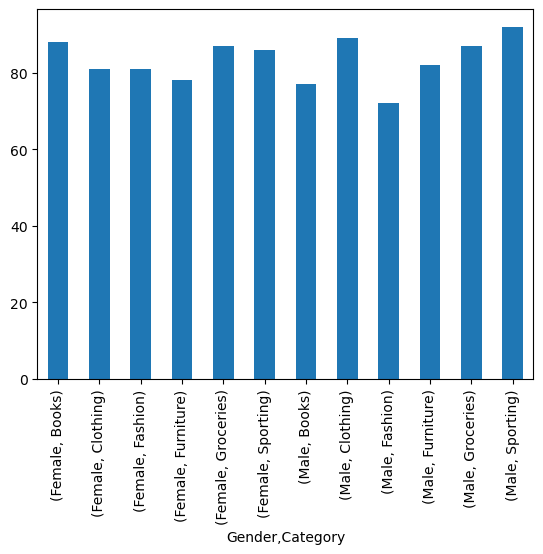

In [161]:
sales_m_w.plot(kind='bar')
plt.show()